In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.applications.imagenet_utils import decode_predictions
import keras
import tensorflow as tf
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential
import os
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
#from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
#from keras.applications.resnet import ResNet, preprocess_input,decode_predictions
from keras.preprocessing.image import ImageDataGenerator , img_to_array,load_img

In [ ]:
train_path='/content/drive/MyDrive/Citrus/Classifier'
valid_path='/content/drive/MyDrive/Citrus/Classifier'

In [ ]:
len(os.listdir("/content/drive/MyDrive/Citrus/Classifier"))

5

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=(preprocess_input),
    rotation_range = 90,
   shear_range = 0.2,
    zoom_range = 0.2,
      horizontal_flip = True,
   #fill_mode = 'nearest',
    validation_split = 0.2
)

val_datagen = ImageDataGenerator(
    preprocessing_function=(preprocess_input)
)

In [ ]:
train= train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Citrus/Classifier",target_size=(256,256),batch_size=32)
val = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Citrus/Classifier",target_size=(256,256),batch_size=32)


Found 150 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [ ]:
t_img , label=train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/225)
    plt.show()

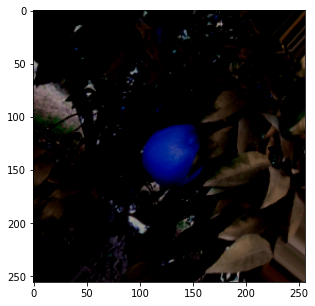

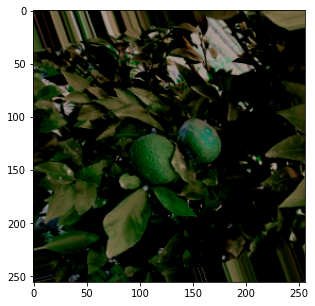

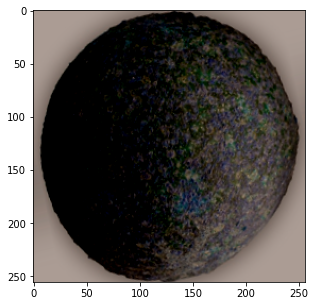

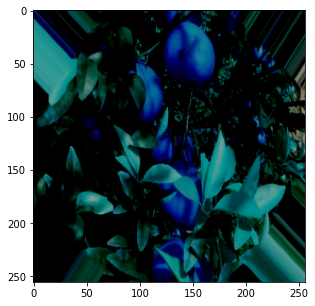

In [ ]:
plotImage(t_img[:4],label[:4])

Building MODel


In [ ]:
import tensorflow
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.models import Model
#from keras.applications import resnet
from keras.applications.vgg16 import VGG16

In [ ]:
myModel = Sequential()
myModel.add(Conv2D(64, kernel_size = (5,5), padding = 'SAME', activation = 'relu', input_shape=(256,256,3)))
myModel.add(MaxPool2D(2,2))
myModel.add(Dropout(0.2))
myModel.add(Conv2D(128, kernel_size=(3,3), padding = 'SAME', activation = 'relu'))
myModel.add(MaxPool2D(2,2))
myModel.add(Conv2D(256, kernel_size=(3,3), padding = 'SAME', activation = 'relu'))
myModel.add(Flatten())
myModel.add(Dense(128,activation='relu'))
myModel.add(Dense(64, activation = 'relu'))
myModel.add(Dense(10, activation = 'softmax'))
myModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       2

In [ ]:
from keras import activations
X=Flatten()(myModel.output)
X=Dense(units=5, activation="softmax")(X)

In [ ]:
his=myModel.fit_generator(train,
                     
                        epochs=25,
                        verbose=1,
                        validation_data=val
                        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


RuntimeError: ignored

In [ ]:
myModel.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=["accuracy"])

In [ ]:
h=his.history

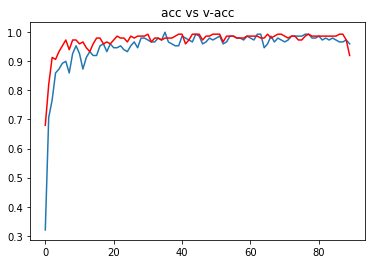

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

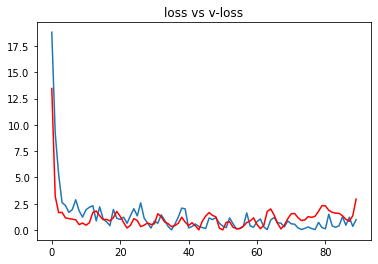

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()